In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from model import Model

In [2]:
data = pd.read_csv('data.csv')
data

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,...,p13,p14,p15,p16,p17,p18,p19,p20,s1,s2
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,...,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,...,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,...,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,...,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,...,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,518.67,1.3,48.17,520.44,2388.17,8218.63,8.5194,0.03,...,23.1678,1604.26,1428.92,14.62,21.61,552.24,2388.20,9145.62,0.0042,0.0002
16134,80,182,518.67,1.3,48.41,520.06,2388.12,8221.91,8.5493,0.03,...,23.0142,1598.32,1426.31,14.62,21.61,551.60,2388.16,9160.23,-0.0014,0.0004
16135,80,183,518.67,1.3,48.04,519.67,2388.21,8217.46,8.5106,0.03,...,22.9337,1603.37,1434.30,14.62,21.61,551.78,2388.12,9152.84,0.0018,0.0000
16136,80,184,518.67,1.3,48.04,519.72,2388.20,8228.65,8.4983,0.03,...,22.9971,1603.01,1430.23,14.62,21.61,551.78,2388.17,9164.10,-0.0024,0.0002


In [3]:
# sorting data to maintain ordering
data = data.sort_values(by = ['id', 'cycle'])
data

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,...,p13,p14,p15,p16,p17,p18,p19,p20,s1,s2
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,...,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,...,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,...,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,...,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,...,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,518.67,1.3,48.17,520.44,2388.17,8218.63,8.5194,0.03,...,23.1678,1604.26,1428.92,14.62,21.61,552.24,2388.20,9145.62,0.0042,0.0002
16134,80,182,518.67,1.3,48.41,520.06,2388.12,8221.91,8.5493,0.03,...,23.0142,1598.32,1426.31,14.62,21.61,551.60,2388.16,9160.23,-0.0014,0.0004
16135,80,183,518.67,1.3,48.04,519.67,2388.21,8217.46,8.5106,0.03,...,22.9337,1603.37,1434.30,14.62,21.61,551.78,2388.12,9152.84,0.0018,0.0000
16136,80,184,518.67,1.3,48.04,519.72,2388.20,8228.65,8.4983,0.03,...,22.9971,1603.01,1430.23,14.62,21.61,551.78,2388.17,9164.10,-0.0024,0.0002


In [4]:
data.nunique()

id         80
cycle     362
p00         1
p01         1
p02       156
p03       418
p04        56
p05      5707
p06      1871
p07         1
p08        12
p09         1
p10         1
p11       307
p12       116
p13      4518
p14      2899
p15      3865
p16         1
p17         2
p18       502
p19        53
p20      5955
s1        155
s2         13
dtype: int64

In [5]:
# removing columns with less than 2 distinct values
filtered_data = data.loc[:, data.nunique() >= 2].copy()
filtered_data

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
0,1,1,47.47,521.66,2388.02,8138.62,8.4195,392,641.82,39.06,23.4190,1589.70,1400.60,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,23.4236,1591.82,1403.14,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,23.3442,1587.99,1404.20,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,47.13,522.86,2388.08,8133.83,8.3682,392,642.35,38.88,23.3739,1582.79,1401.87,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,47.28,522.19,2388.04,8133.80,8.4294,393,642.37,38.90,23.4044,1582.85,1406.22,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,48.17,520.44,2388.17,8218.63,8.5194,397,644.00,38.39,23.1678,1604.26,1428.92,21.61,552.24,2388.20,9145.62,0.0042,0.0002
16134,80,182,48.41,520.06,2388.12,8221.91,8.5493,396,643.81,38.34,23.0142,1598.32,1426.31,21.61,551.60,2388.16,9160.23,-0.0014,0.0004
16135,80,183,48.04,519.67,2388.21,8217.46,8.5106,397,643.49,38.34,22.9337,1603.37,1434.30,21.61,551.78,2388.12,9152.84,0.0018,0.0000
16136,80,184,48.04,519.72,2388.20,8228.65,8.4983,397,643.83,38.53,22.9971,1603.01,1430.23,21.61,551.78,2388.17,9164.10,-0.0024,0.0002


In [6]:
# creating new features to find change between current and previous state of parameters
filtered_data = pd.concat(
    [
        filtered_data,
        filtered_data.groupby('id').diff().iloc[:, 1:].rename(
            {col: col + '_change' for col in filtered_data.columns[2:]}
        )
    ], axis = 1
)
filtered_data

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,...,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
0,1,1,47.47,521.66,2388.02,8138.62,8.4195,392,641.82,39.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,...,-0.06,0.0046,2.12,2.54,0.0,-0.61,-0.02,-2.12,0.0026,0.0001
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,...,-0.05,-0.0794,-3.83,1.06,0.0,0.51,0.04,8.87,-0.0062,0.0006
3,1,4,47.13,522.86,2388.08,8133.83,8.3682,392,642.35,38.88,...,-0.07,0.0297,-5.20,-2.33,0.0,0.19,0.03,-3.46,0.0050,-0.0003
4,1,5,47.28,522.19,2388.04,8133.80,8.4294,393,642.37,38.90,...,0.02,0.0305,0.06,4.35,0.0,-0.45,-0.05,5.67,-0.0026,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,48.17,520.44,2388.17,8218.63,8.5194,397,644.00,38.39,...,-0.11,0.0986,1.39,6.22,0.0,0.70,0.03,-10.32,0.0037,0.0004
16134,80,182,48.41,520.06,2388.12,8221.91,8.5493,396,643.81,38.34,...,-0.05,-0.1536,-5.94,-2.61,0.0,-0.64,-0.04,14.61,-0.0056,0.0002
16135,80,183,48.04,519.67,2388.21,8217.46,8.5106,397,643.49,38.34,...,0.00,-0.0805,5.05,7.99,0.0,0.18,-0.04,-7.39,0.0032,-0.0004
16136,80,184,48.04,519.72,2388.20,8228.65,8.4983,397,643.83,38.53,...,0.19,0.0634,-0.36,-4.07,0.0,0.00,0.05,11.26,-0.0042,0.0002


In [7]:
filtered_data.isna().sum()

id        0
cycle     0
p02       0
p03       0
p04       0
p05       0
p06       0
p08       0
p11       0
p12       0
p13       0
p14       0
p15       0
p17       0
p18       0
p19       0
p20       0
s1        0
s2        0
p02      80
p03      80
p04      80
p05      80
p06      80
p08      80
p11      80
p12      80
p13      80
p14      80
p15      80
p17      80
p18      80
p19      80
p20      80
s1       80
s2       80
dtype: int64

In [8]:
# dropping rows with null values since they are few
filtered_data = filtered_data.dropna()
filtered_data

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,...,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,...,-0.06,0.0046,2.12,2.54,0.0,-0.61,-0.02,-2.12,0.0026,0.0001
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,...,-0.05,-0.0794,-3.83,1.06,0.0,0.51,0.04,8.87,-0.0062,0.0006
3,1,4,47.13,522.86,2388.08,8133.83,8.3682,392,642.35,38.88,...,-0.07,0.0297,-5.20,-2.33,0.0,0.19,0.03,-3.46,0.0050,-0.0003
4,1,5,47.28,522.19,2388.04,8133.80,8.4294,393,642.37,38.90,...,0.02,0.0305,0.06,4.35,0.0,-0.45,-0.05,5.67,-0.0026,-0.0002
5,1,6,47.16,521.68,2388.03,8132.85,8.4108,391,642.10,38.98,...,0.08,-0.0375,1.62,-7.85,0.0,0.67,-0.04,-5.47,-0.0024,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,48.17,520.44,2388.17,8218.63,8.5194,397,644.00,38.39,...,-0.11,0.0986,1.39,6.22,0.0,0.70,0.03,-10.32,0.0037,0.0004
16134,80,182,48.41,520.06,2388.12,8221.91,8.5493,396,643.81,38.34,...,-0.05,-0.1536,-5.94,-2.61,0.0,-0.64,-0.04,14.61,-0.0056,0.0002
16135,80,183,48.04,519.67,2388.21,8217.46,8.5106,397,643.49,38.34,...,0.00,-0.0805,5.05,7.99,0.0,0.18,-0.04,-7.39,0.0032,-0.0004
16136,80,184,48.04,519.72,2388.20,8228.65,8.4983,397,643.83,38.53,...,0.19,0.0634,-0.36,-4.07,0.0,0.00,0.05,11.26,-0.0042,0.0002


In [9]:
# creating time_to_failure column to be used as target label
filtered_data.loc[:, 'time_to_failure'] = (filtered_data.groupby('id')['cycle'].transform('max') - filtered_data['cycle'])
filtered_data

C:\Users\elnur\AppData\Local\Temp\ipykernel_28160\3850801896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'time_to_failure'] = (filtered_data.groupby('id')['cycle'].transform('max') - filtered_data['cycle'])


,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,...,p13,p14,p15,p17,p18,p19,p20,s1,s2,time_to_failure
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,...,0.0046,2.12,2.54,0.0,-0.61,-0.02,-2.12,0.0026,0.0001,190
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,...,-0.0794,-3.83,1.06,0.0,0.51,0.04,8.87,-0.0062,0.0006,189
3,1,4,47.13,522.86,2388.08,8133.83,8.3682,392,642.35,38.88,...,0.0297,-5.20,-2.33,0.0,0.19,0.03,-3.46,0.0050,-0.0003,188
4,1,5,47.28,522.19,2388.04,8133.80,8.4294,393,642.37,38.90,...,0.0305,0.06,4.35,0.0,-0.45,-0.05,5.67,-0.0026,-0.0002,187
5,1,6,47.16,521.68,2388.03,8132.85,8.4108,391,642.10,38.98,...,-0.0375,1.62,-7.85,0.0,0.67,-0.04,-5.47,-0.0024,0.0001,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,48.17,520.44,2388.17,8218.63,8.5194,397,644.00,38.39,...,0.0986,1.39,6.22,0.0,0.70,0.03,-10.32,0.0037,0.0004,4
16134,80,182,48.41,520.06,2388.12,8221.91,8.5493,396,643.81,38.34,...,-0.1536,-5.94,-2.61,0.0,-0.64,-0.04,14.61,-0.0056,0.0002,3
16135,80,183,48.04,519.67,2388.21,8217.46,8.5106,397,643.49,38.34,...,-0.0805,5.05,7.99,0.0,0.18,-0.04,-7.39,0.0032,-0.0004,2
16136,80,184,48.04,519.72,2388.20,8228.65,8.4983,397,643.83,38.53,...,0.0634,-0.36,-4.07,0.0,0.00,0.05,11.26,-0.0042,0.0002,1


In [10]:
#splitting data to train and test based in ids
train_ids, test_ids = train_test_split(filtered_data.id.unique(), test_size = 0.2, random_state = 42)
train_data = filtered_data[filtered_data.id.isin(train_ids)].copy()
test_data = filtered_data[filtered_data.id.isin(test_ids)].copy()

In [11]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(train_data.iloc[:, 2:-1])
train_data.iloc[:, 2:-1] = scaler.transform(train_data.iloc[:, 2:-1])
test_data.iloc[:, 2:-1] = scaler.transform(test_data.iloc[:, 2:-1])
train_data

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,...,p13,p14,p15,p17,p18,p19,p20,s1,s2,time_to_failure
193,2,2,-1.127879,1.736563,-1.585371,-0.641345,-0.685429,-0.786998,-1.719392,1.342974,...,-0.570916,0.554222,0.297049,5.099822,0.437255,-0.721296,-0.619255,1.966607,-2.186343,285
194,2,3,-1.202298,1.575358,-1.449310,-0.173783,-1.648980,-1.431057,-2.256042,1.617796,...,0.212300,0.210701,0.989977,-5.100624,0.662217,1.372205,0.457835,-0.805661,1.459059,284
195,2,4,-1.648809,1.454455,-2.265672,-0.180681,-1.078769,-1.431057,-1.997655,1.727725,...,0.933094,-0.752576,-0.526456,5.099822,-1.518183,-1.419129,0.600541,0.548237,-1.700290,283
196,2,5,-1.090670,1.158914,-2.129612,-0.366425,-1.477389,-2.075116,-1.898276,2.002547,...,-0.916002,-0.920796,1.096179,-5.100624,1.527456,1.139594,-0.016153,-0.966840,1.945112,282
197,2,6,-1.834855,1.870899,-1.449310,-0.515217,-1.654260,-0.786998,-2.752940,1.837654,...,0.060368,-0.285104,-1.027871,5.099822,-0.220326,0.209149,-0.733080,-0.483305,0.000898,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,2.332581,-1.299452,0.999776,3.671658,2.025714,2.433298,2.613559,-2.339645,...,1.179248,0.231949,1.057877,-0.000401,1.233275,0.674371,-1.793180,1.192951,0.973005,4
16134,80,182,3.225603,-1.809932,0.319474,3.833260,2.815035,1.789239,2.235916,-2.614468,...,-1.791085,-1.065995,-0.479448,-0.000401,-1.085564,-0.953907,2.442126,-1.804967,0.486952,3
16135,80,183,1.848861,-2.333846,1.544018,3.614013,1.793406,2.433298,1.599887,-2.614468,...,-0.930136,0.880036,1.366038,-0.000401,0.333427,-0.953907,-1.295409,1.031772,-0.971209,2
16136,80,184,1.848861,-2.266678,1.407957,4.165333,1.468703,2.433298,2.275668,-1.570143,...,0.764673,-0.077928,-0.733638,-0.000401,0.021941,1.139594,1.873001,-1.353668,0.486952,1


In [12]:
train_data.sort_values(by = ['id', 'cycle'], inplace = True)
test_data.sort_values(by = ['id', 'cycle'], inplace = True)

In [13]:
model_1 = Model(model_type = 'm_to_m')

model_1.prepare_data(train_data, test_data, sequence_type='sliding_window')

model_1.train_model(epochs = 50, batch_size=64)

Epoch 1/50
73/73 [==============================] - 11s 121ms/step - loss: 3053.5918 - mae: 40.1778 - val_loss: 2531.7820 - val_mae: 34.9948
Epoch 2/50
73/73 [==============================] - 9s 123ms/step - loss: 1035.9539 - mae: 24.9799 - val_loss: 2253.0366 - val_mae: 32.3381
Epoch 3/50
73/73 [==============================] - 9s 123ms/step - loss: 901.1397 - mae: 23.0241 - val_loss: 2038.4066 - val_mae: 29.7846
Epoch 4/50
73/73 [==============================] - 9s 123ms/step - loss: 812.8920 - mae: 21.6455 - val_loss: 1905.1848 - val_mae: 28.7007
Epoch 5/50
73/73 [==============================] - 9s 127ms/step - loss: 772.9627 - mae: 21.0232 - val_loss: 1840.9818 - val_mae: 28.0655
Epoch 6/50
73/73 [==============================] - 9s 125ms/step - loss: 748.0118 - mae: 20.7450 - val_loss: 1832.0741 - val_mae: 27.5816
Epoch 7/50
73/73 [==============================] - 9s 122ms/step - loss: 732.8164 - mae: 20.3898 - val_loss: 1809.4446 - val_mae: 27.3940
Epoch 8/50
73/73 [======

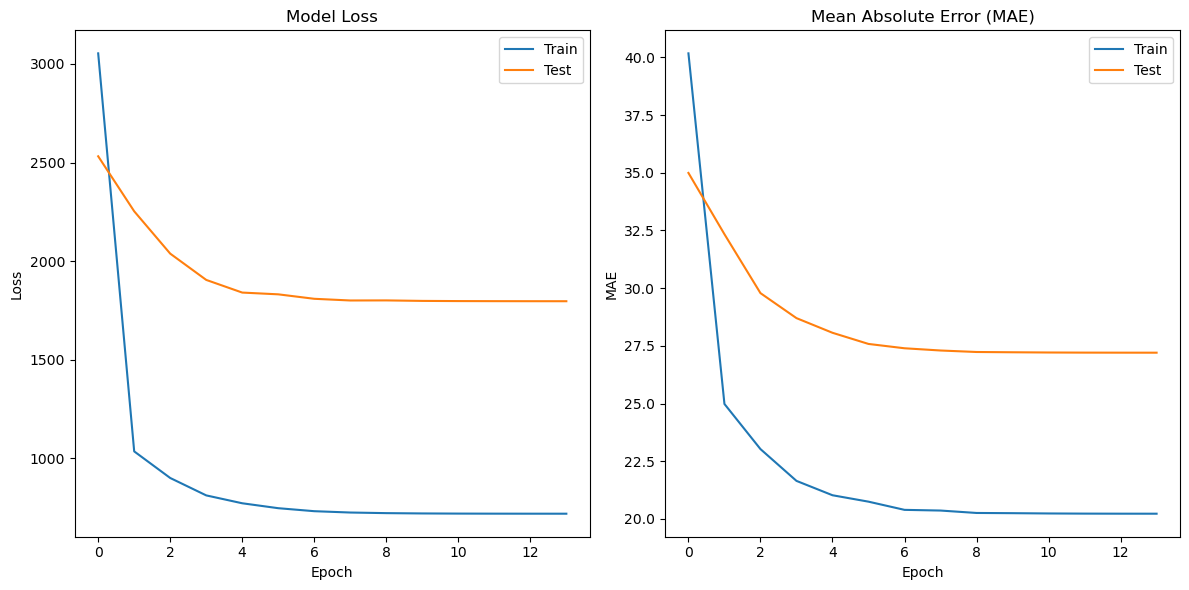

In [14]:
model_1.plot_training_history()

In [16]:
model_2 = Model(model_type = 'm_to_m')

model_2.prepare_data(train_data, test_data, sequence_type='padding')
print(model_2.X_train.shape)
model_2.train_model(batch_size=2)

(64, 313, 36)
Epoch 1/50
32/32 [==============================] - 5s 100ms/step - loss: 3755.2263 - mae: 39.0264 - val_loss: 1653.3457 - val_mae: 25.2879
Epoch 2/50
32/32 [==============================] - 3s 79ms/step - loss: 996.2462 - mae: 20.4761 - val_loss: 1458.1873 - val_mae: 23.2556
Epoch 3/50
32/32 [==============================] - 3s 78ms/step - loss: 935.0770 - mae: 20.4559 - val_loss: 1280.4106 - val_mae: 24.9624
Epoch 4/50
32/32 [==============================] - 3s 79ms/step - loss: 976.8583 - mae: 20.8537 - val_loss: 1256.6962 - val_mae: 24.4411
Epoch 5/50
32/32 [==============================] - 3s 84ms/step - loss: 848.1567 - mae: 18.6024 - val_loss: 1267.2714 - val_mae: 22.9088
Epoch 6/50
32/32 [==============================] - 3s 83ms/step - loss: 842.1985 - mae: 18.2788 - val_loss: 1242.3805 - val_mae: 23.1628
Epoch 7/50
32/32 [==============================] - 3s 81ms/step - loss: 839.7958 - mae: 19.0055 - val_loss: 1227.5134 - val_mae: 22.9567
Epoch 8/50
32/32 [

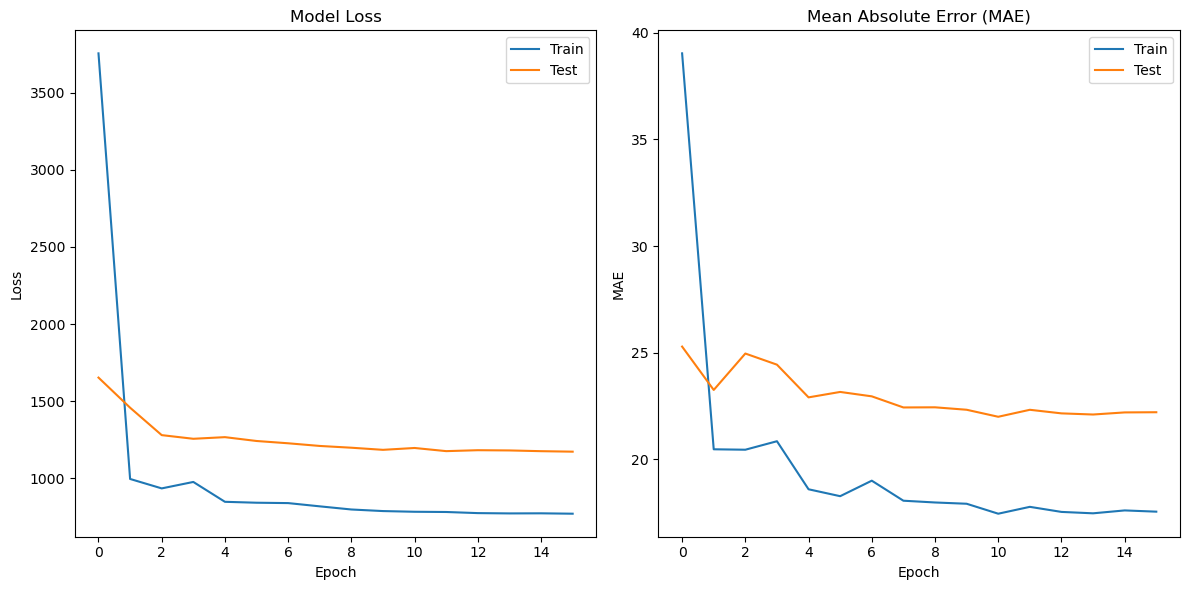

In [17]:
model_2.plot_training_history()

In [18]:
model_3 = Model(model_type = 'm_to_1')

model_3.prepare_data(train_data, test_data, sequence_type='sliding_window')
print(model_3.X_train.shape)
model_3.train_model(batch_size=256)

(4656, 127, 36)
Epoch 1/50
19/19 [==============================] - 8s 315ms/step - loss: 1609.5593 - mae: 30.9857 - val_loss: 2548.2241 - val_mae: 35.1685
Epoch 2/50
19/19 [==============================] - 6s 300ms/step - loss: 970.2714 - mae: 24.2082 - val_loss: 1882.7112 - val_mae: 28.9767
Epoch 3/50
19/19 [==============================] - 6s 308ms/step - loss: 623.2606 - mae: 19.0421 - val_loss: 1354.1302 - val_mae: 21.7823
Epoch 4/50
19/19 [==============================] - 6s 315ms/step - loss: 430.0992 - mae: 15.4258 - val_loss: 1009.6744 - val_mae: 17.1398
Epoch 5/50
19/19 [==============================] - 6s 317ms/step - loss: 330.1692 - mae: 12.9777 - val_loss: 936.9790 - val_mae: 15.7283
Epoch 6/50
19/19 [==============================] - 6s 309ms/step - loss: 270.4907 - mae: 11.2051 - val_loss: 807.0517 - val_mae: 14.7465
Epoch 7/50
19/19 [==============================] - 6s 320ms/step - loss: 213.8929 - mae: 9.8024 - val_loss: 698.1341 - val_mae: 13.2842
Epoch 8/50
19/

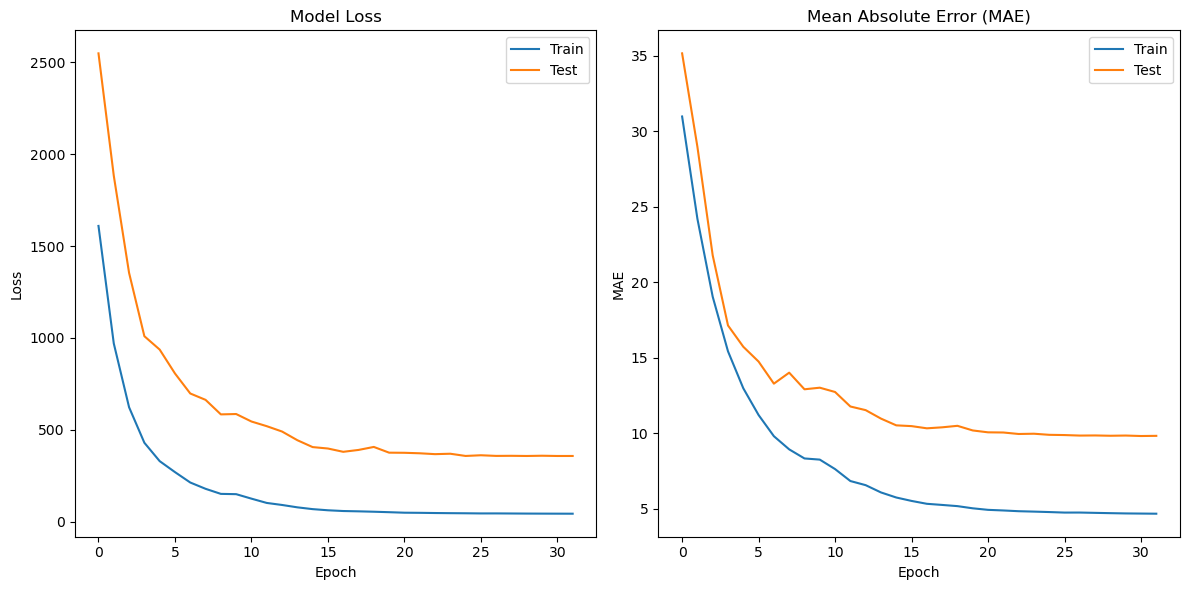

In [19]:
model_3.plot_training_history()